In [8]:
import nltk
import re
from nltk import word_tokenize
import GetOldTweets3 as got
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests

consumer_key='rNrnFupaEqKt0eb7hjbdHKdWg'
consumer_secret= 'DTTMoQOrCBmngaXmOnFhrBjdjwtT54x0AbGvNwwuqyYNWwEvc7'
access_token='1002268050513575936-gGrQUmDiMyCxO2Y88lc3ojqNzbtLGm'
access_token_secret='G572YTe2S5TQTTaXhFvl1WyNopa8ilrkgWSlCXBZQwU4C'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


tweetCriteria = got.manager.TweetCriteria().setUsername("@N_Hiranandani")\
                                           .setSince("2019-01-01")\
                                           .setUntil("2019-12-29")\
                                           .setMaxTweets(100000)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

stat=api.get_status(tweet[0].id)


url = 'http://api.namsor.com/onomastics/api/json/gender/Niranjan/Hiranandani'
response = requests.get(url)
t=response.json()



In [11]:
print("The name of the user is: ",stat.user.name)
print("The location of the user is: ",stat.user.location)
print("The gender of the user is: ",t['gender'])


The name of the user is:  Niranjan Hiranandani
The location of the user is:  Mumbai


              Word  Frequency
1            india        100
2           mumbai         89
3            thane         71
4               rs         61
5           growth         59
6              new         56
7   infrastructure         53
8            metro         52
9           sector         48
10            real         47
11       liquidity         47
12     hiranandani         46
13          estate         45
14         economy         44


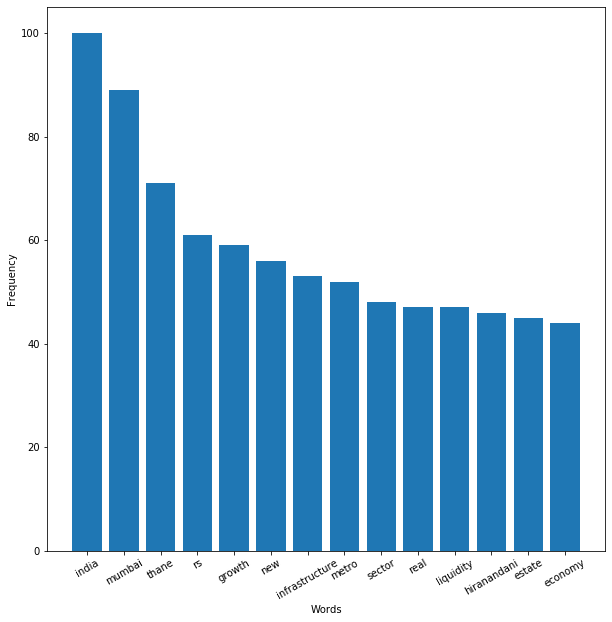

In [12]:
nounlist=list()
for i in tweet:
    try:
        text1 = active.deEmojify(i.text) 
#         print(text1)
        text=active.clean_tweet(text1)
      #  clean.append(text)
        blob = TextBlob(text)
        for nouns in blob.noun_phrases:
            nounlist.append(nouns)
    except Exception as e:
        continue

li1=pd.Series(nounlist)


active.wordcloud(li1)


expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
              Word  Frequency
1           mumbai        109
2       realestate        108
3            thane         85
4          housing         83
5           growth         80
6               rs         77
7   infrastructure         69
8           sector         68
9           estate         62
10        projects         61
11     hiranandani         59
12       liquidity         57
13         economy         56
14           metro         56


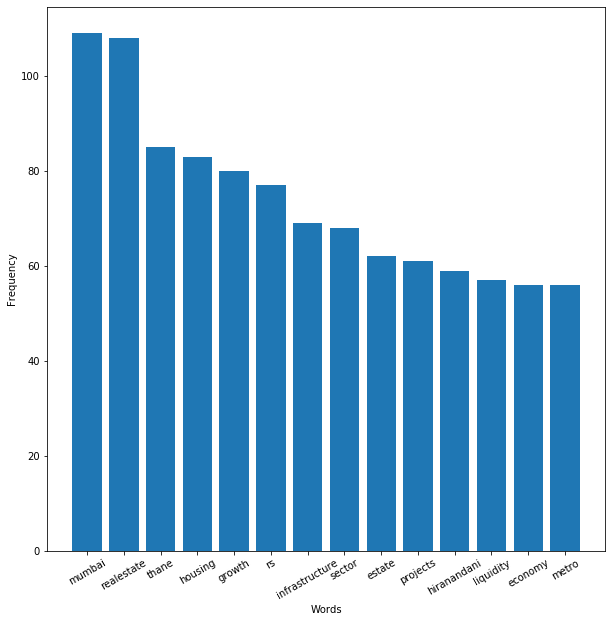

In [7]:
from nltk import word_tokenize
import nltk
nounlist=list()
for i in tweet:
    try:
        text1 = active.deEmojify(i.text) 
        text2=active.clean_tweet(text1)
        text3=text2.replace('&amp;', ' ')
        text=word_tokenize(text3)

        hello=nltk.pos_tag(text)
        #print(hello)
        is_noun = lambda pos: pos[:2] == 'NN'
        nouns = [word for (word, pos) in hello if is_noun(pos)] 
        nounlist.extend(nouns)
    except Exception as e:
        print(e)
        
        
li1=pd.Series(nounlist)

active.wordcloud(li1)






In [13]:
import os
st = StanfordNERTagger('C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz','C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-ner.jar',encoding='utf-8')
java_path = "C:/Program Files/Java/jdk1.8.0_131/bin/java.exe"
os.environ['JAVAHOME'] = java_path


tokenized_text = word_tokenize(text)
classified_text = st.tag(tokenized_text)

is_noun = lambda pos: pos[:3] == 'ORG'
nouns = [word for (word, pos) in classified_text if is_noun(pos)] 
print(nouns)
noun=pd.Series(nouns)
active.wordcloud(noun)

CRFClassifier invoked on Sun Dec 29 22:14:37 IST 2019 with arguments:
   -loadClassifier C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz -textFile C:\Users\Parth\AppData\Local\Temp\tmpz6tes5c0 -outputFormat slashTags -tokenizerFactory edu.stanford.nlp.process.WhitespaceTokenizer -tokenizerOptions "tokenizeNLs=false" -encoding utf-8
tokenizerFactory=edu.stanford.nlp.process.WhitespaceTokenizer
tokenizerOptions="tokenizeNLs=false"
loadClassifier=C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz
encoding=utf-8
textFile=C:\Users\Parth\AppData\Local\Temp\tmpz6tes5c0
outputFormat=slashTags
Loading classifier from C:\Users\Parth\Contacts\Downloads\New Stanford\stanford-english-corenlp-2018-10-05-models\edu\stanford\nlp\models\ner\english.all.3class.caseless.distsim

OSError: Java command failed : ['C:/Program Files/Java/jdk1.8.0_131/bin/java.exe', '-mx1000m', '-cp', 'C:/Users/Parth/Contacts/Downloads/stanford-ner-2015-04-20/stanford-ner.jar', 'edu.stanford.nlp.ie.crf.CRFClassifier', '-loadClassifier', 'C:/Users/Parth/Contacts/Downloads/New Stanford/stanford-english-corenlp-2018-10-05-models/edu/stanford/nlp/models/ner/english.all.3class.caseless.distsim.crf.ser.gz', '-textFile', 'C:\\Users\\Parth\\AppData\\Local\\Temp\\tmpz6tes5c0', '-outputFormat', 'slashTags', '-tokenizerFactory', 'edu.stanford.nlp.process.WhitespaceTokenizer', '-tokenizerOptions', '"tokenizeNLs=false"', '-encoding', 'utf-8']